In [1]:
from QAOAproblems import QAOAmaxcut
import numpy as np
from pymoo.core.problem import Problem
import networkx as nx
import matplotlib as plt

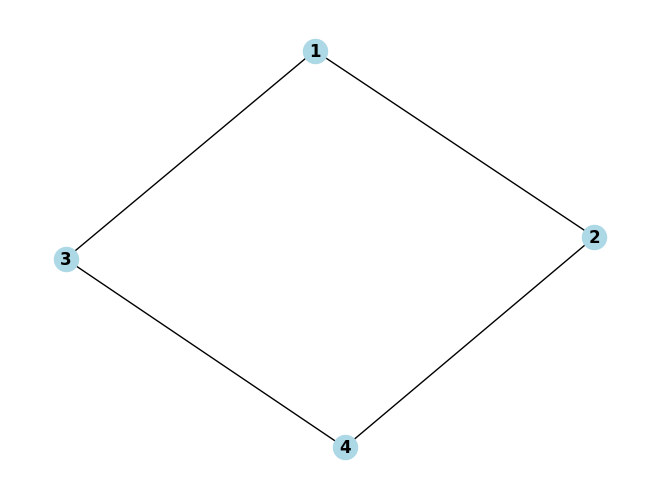

In [2]:
qubitmap_t = [0,1,2,3,4]
QM = nx.Graph()
QM.add_edges_from([(1,2),(1,3), (2,4), (3,4)])
nx.draw(QM, with_labels=True, node_color='lightblue', font_weight='bold')

In [3]:
max_cut = QAOAmaxcut(num_gates=4, qubitmap=qubitmap_t, hardware_graph=QM,current_time=[0,0,0,0,0] )

In [4]:
ch1 = [(3,4), (1,3), (1,2), (3,4)]
ch2 = [(3,4), (1,3), (1,2), (3,2)]

In [5]:
max_cut.decoding(ch1=ch1, ch2=ch2)

Teste 0
add ps 0
Teste 1
add ps 1
Teste 2
add ps 2
Teste 3
add_swaps
4 2 3 2 3 2
add ps 3
add mix
[0, 9, 14, 14, 11]


In [6]:
max_cut.node_time

[1, 10, 15, 15, 12]